# Tugas 2  Python Cahya Idznii Igawati

## Cleansing Data

Introduction to Python 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import data 1

In [27]:
df = pd.read_csv('[BRI] Python Assessment Data.csv')
df.head()

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success


Indentifikasi Database dan Cleansing Database

In [28]:
#melihat tipe data
df.dtypes

No                      int64
Transaction Number     object
Merchant ID            object
Tipe Transaksi         object
Nama Issuer            object
Nominal               float64
Transaction Date       object
Status                 object
dtype: object

dari hasil data satu didapatkan hasil bahwa variabel nominal mempunyai tipe data float sedangkan untuk lainnya adalah object sehingga tipe data untuk variabel transaction date harus diubah dalam bentuk date

In [29]:
#mengubah Transaction Date menjadi tipe date
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], format = "%Y-%m-%d %H:%M:%S")
df.head()

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success


In [31]:
#menghapus variabel Nomor dan Status
df.drop(columns = ["No", "Status"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Number  11000 non-null  object        
 1   Merchant ID         10966 non-null  object        
 2   Tipe Transaksi      11000 non-null  object        
 3   Nama Issuer         11000 non-null  object        
 4   Nominal             10989 non-null  float64       
 5   Transaction Date    11000 non-null  datetime64[ns]
 6   Tanggal             11000 non-null  object        
 7   Waktu               11000 non-null  object        
 8   Jam                 11000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 773.6+ KB


In [32]:
#memisahkan tanggal dan waktu
df['Tanggal']= df["Transaction Date"].dt.date
df['Waktu']= df["Transaction Date"].dt.time
df['Jam']= df["Transaction Date"].dt.hour
df.head()

,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam
0,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,2022-07-10,23:44:59,23
1,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,2022-07-10,23:36:31,23
2,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,2022-07-10,23:32:14,23
3,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,2022-07-20,23:32:39,23
4,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,2022-07-10,23:18:16,23


Melihat dan menghapus missing value

In [33]:
#menghitung missing value tiap variabel
df.isna().sum()

Transaction Number     0
Merchant ID           34
Tipe Transaksi         0
Nama Issuer            0
Nominal               11
Transaction Date       0
Tanggal                0
Waktu                  0
Jam                    0
dtype: int64

In [34]:
#menghapus data missing
df = df.dropna()

In [35]:
#menghitung missing value tiap variabel
df.isna().sum()

Transaction Number    0
Merchant ID           0
Tipe Transaksi        0
Nama Issuer           0
Nominal               0
Transaction Date      0
Tanggal               0
Waktu                 0
Jam                   0
dtype: int64

sebelum mengolah maka kita harus melakukan cleaning data dimana data tidak boleh terdeteksi duplikat sehingga akan menghapus data duplikat untuk semua variabel yang sama sehingga ddihapuskan duplikat yang sama untuk setiap variabelnya

In [36]:
#menghapus duplikat yang sama setiap variabelnya 
df_new = df.drop_duplicates()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10120 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Number  10120 non-null  object        
 1   Merchant ID         10120 non-null  object        
 2   Tipe Transaksi      10120 non-null  object        
 3   Nama Issuer         10120 non-null  object        
 4   Nominal             10120 non-null  float64       
 5   Transaction Date    10120 non-null  datetime64[ns]
 6   Tanggal             10120 non-null  object        
 7   Waktu               10120 non-null  object        
 8   Jam                 10120 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 790.6+ KB


setelah data yang merupakan duplikat sama untuk semua variabel dihapus untuk duplikatnya, maka selanjutnya adalah kita menghapus data yang memiliki transaction number sama. hal ini adalah untuk data dengan number transaction sama tetapi dalam statusnya pembayaran dan refund sehingga kita harus menghapus kedua transaksi tersebut.

In [37]:
#menghapus duplikat berdasarkan variabel Transaction Number
df = df_new.drop_duplicates(subset=['Transaction Number'], keep=  False  )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10016 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Number  10016 non-null  object        
 1   Merchant ID         10016 non-null  object        
 2   Tipe Transaksi      10016 non-null  object        
 3   Nama Issuer         10016 non-null  object        
 4   Nominal             10016 non-null  float64       
 5   Transaction Date    10016 non-null  datetime64[ns]
 6   Tanggal             10016 non-null  object        
 7   Waktu               10016 non-null  object        
 8   Jam                 10016 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 782.5+ KB


In [38]:
#melihat proporsi kategori tipe transaksi
df['Tipe Transaksi'].value_counts()

Pembayaran    10000
Refund           16
Name: Tipe Transaksi, dtype: int64

In [39]:
#mengecek apakah terdapat duplicate
df['Transaction Number'].duplicated().any()

False

In [40]:
#mengecek apakah terdapat duplicate untuk semua variabel
df.duplicated().any()

False

terdapat 16 data yang merupakan data refund dan untuk prmbayaran adalah 10000 data

Gabung Dengan Data2 

In [41]:
df2 =pd.read_csv('[BRI] Python Assessment Data 2.csv')
df2.head()

,Merchant ID,Merchant Criteria,Merchant Type
0,X610005443,(UMI) Usaha Mikro,Restaurants
1,X610005869,(UMI) Usaha Mikro,Miscellaneous
2,X314022534,(UKE) Usaha Kecil,Food & Beverages
3,X612400459,(UKE) Usaha Kecil,Miscellaneous
4,X614400335,(UKE) Usaha Kecil,Miscellaneous


In [42]:
#menghitung missing value tiap variabel
df2.isna().sum()

Merchant ID          0
Merchant Criteria    0
Merchant Type        0
dtype: int64

tidak terdapat missing value pada data kedua sehingga dilanjutkan digabungkan data pertama dan kedua

In [43]:
#gabung tabel
df_join = df.merge(df2, on='Merchant ID', how='left')
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10016 entries, 0 to 10015
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Number  10016 non-null  object        
 1   Merchant ID         10016 non-null  object        
 2   Tipe Transaksi      10016 non-null  object        
 3   Nama Issuer         10016 non-null  object        
 4   Nominal             10016 non-null  float64       
 5   Transaction Date    10016 non-null  datetime64[ns]
 6   Tanggal             10016 non-null  object        
 7   Waktu               10016 non-null  object        
 8   Jam                 10016 non-null  int64         
 9   Merchant Criteria   10008 non-null  object        
 10  Merchant Type       10008 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 939.0+ KB


dilakukan cleansing data yang telah digabungkan dan menghapus missing value nya

In [44]:
#menghapus data missing dan cek missing
df_join_nomissing = df_join.dropna() 
df_join_nomissing.isna().sum()

Transaction Number    0
Merchant ID           0
Tipe Transaksi        0
Nama Issuer           0
Nominal               0
Transaction Date      0
Tanggal               0
Waktu                 0
Jam                   0
Merchant Criteria     0
Merchant Type         0
dtype: int64

In [45]:
df_join_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10008 entries, 0 to 10015
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Number  10008 non-null  object        
 1   Merchant ID         10008 non-null  object        
 2   Tipe Transaksi      10008 non-null  object        
 3   Nama Issuer         10008 non-null  object        
 4   Nominal             10008 non-null  float64       
 5   Transaction Date    10008 non-null  datetime64[ns]
 6   Tanggal             10008 non-null  object        
 7   Waktu               10008 non-null  object        
 8   Jam                 10008 non-null  int64         
 9   Merchant Criteria   10008 non-null  object        
 10  Merchant Type       10008 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 938.2+ KB


Mengambil data yang nominal transaksi dibawah 10.000.000

In [46]:
#di filter nominal<10.000.000
df_filter = df_join_nomissing[df_join_nomissing["Nominal"]<=10000000]
df_filter.head()

,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam,Merchant Criteria,Merchant Type
0,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,2022-07-10,23:44:59,23,(UMI) Usaha Mikro,Restaurants
1,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,2022-07-10,23:36:31,23,(UMI) Usaha Mikro,Restaurants
2,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,2022-07-10,23:32:14,23,(UMI) Usaha Mikro,Supermarket/Grocery Stores
3,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,2022-07-20,23:32:39,23,(UMI) Usaha Mikro,Restaurants
4,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,2022-07-10,23:18:16,23,(UMI) Usaha Mikro,Miscellaneous


In [47]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10008 entries, 0 to 10015
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Number  10008 non-null  object        
 1   Merchant ID         10008 non-null  object        
 2   Tipe Transaksi      10008 non-null  object        
 3   Nama Issuer         10008 non-null  object        
 4   Nominal             10008 non-null  float64       
 5   Transaction Date    10008 non-null  datetime64[ns]
 6   Tanggal             10008 non-null  object        
 7   Waktu               10008 non-null  object        
 8   Jam                 10008 non-null  int64         
 9   Merchant Criteria   10008 non-null  object        
 10  Merchant Type       10008 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 938.2+ KB


In [48]:
#melihat proporsi kategori tipe transaksi
df_filter['Tipe Transaksi'].value_counts()

Pembayaran    9992
Refund          16
Name: Tipe Transaksi, dtype: int64

In [49]:
# menghapus data Refund
df_final = df_filter[(df_filter['Tipe Transaksi']== "Pembayaran")]
df_final['Tipe Transaksi'].value_counts()

Pembayaran    9992
Name: Tipe Transaksi, dtype: int64

jumlah data menjadi 9992 karena dari 10.000 data terdapat data yang memiliki Merchant Kriteria Kosong sehingga dihapuskan untuk analisis kali ini. Selanjutnya karena untuk variabel tipe transaksi sudah berupa pembayaran semua maka kita akan menghapus variabel tipe transaksi.

In [63]:
#menghapus variabel  Tipe Transaksi
data = df_final.drop(columns = 'Tipe Transaksi', index = 1)
data.head()

,Transaction Number,Merchant ID,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam,Merchant Criteria,Merchant Type,Kategori Jam,Day,Hari
10015,B004561428,X610153755,DANA,100000.0,2022-07-01 00:13:49,2022-07-01,00:13:49,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10014,B004561651,X610006258,DANA,30000.0,2022-07-01 00:43:01,2022-07-01,00:43:01,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10013,B004561820,X610153755,DANA,50000.0,2022-07-01 01:12:04,2022-07-01,01:12:04,1,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10012,B004561975,X610153453,OVO,49412.0,2022-07-01 01:44:30,2022-07-01,01:44:30,1,(UMI) Usaha Mikro,Automobiles And Vehicles,Midnight,Friday,Weekday
10011,B004562347,X612094437,DANA,68000.0,2022-07-01 03:26:26,2022-07-01,03:26:26,3,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Midnight,Friday,Weekday


# Tugas Pivot Tabel  2

In [64]:
# dilakukan sort untuk 'Transaction Date'
data = data.sort_values(
            by = 'Transaction Date')

In [65]:
data.head()

,Transaction Number,Merchant ID,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam,Merchant Criteria,Merchant Type,Kategori Jam,Day,Hari
10015,B004561428,X610153755,DANA,100000.0,2022-07-01 00:13:49,2022-07-01,00:13:49,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10014,B004561651,X610006258,DANA,30000.0,2022-07-01 00:43:01,2022-07-01,00:43:01,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10013,B004561820,X610153755,DANA,50000.0,2022-07-01 01:12:04,2022-07-01,01:12:04,1,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10012,B004561975,X610153453,OVO,49412.0,2022-07-01 01:44:30,2022-07-01,01:44:30,1,(UMI) Usaha Mikro,Automobiles And Vehicles,Midnight,Friday,Weekday
10011,B004562347,X612094437,DANA,68000.0,2022-07-01 03:26:26,2022-07-01,03:26:26,3,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Midnight,Friday,Weekday


## Membuat Kategori/ Tagging Untuk Data 

### 1. Membuat Kategori Jam 

In [66]:
#Melakukan kategori 
#Pembagian kategori jam 

#Midnight: 0.00 – 4.00
#Morning: 4.00 – 11.00
#Noon: 11.00  – 13.00 
#Afternoon: 13.00 – 17.00 
#Night: 18.00  – 24.00 

In [68]:
x = [
    (data['Jam'] >= 0) & (data['Jam'] < 4),
    (data['Jam'] < 11) & (data['Jam'] >= 4),
    (data['Jam'] < 13) & (data['Jam'] >= 11),
    (data['Jam'] < 17) & (data['Jam'] >= 13),
    (data['Jam'] <= 24) & (data['Jam'] >= 17)
]

y = ['Midnight','Morning','Noon','Afternoon','Night']

data['Kategori Jam']= np.select(x, y)

In [69]:
data["Kategori Jam"].value_counts()

Night        3201
Afternoon    2998
Morning      1903
Noon         1651
Midnight      238
Name: Kategori Jam, dtype: int64

In [84]:
df_pivot1 = df_final.pivot_table( index= ['Kategori Jam'], aggfunc={'Kategori Jam':'count'})
df_pivot1

,Kategori Jam
Kategori Jam,
Afternoon,2998
Midnight,238
Morning,1903
Night,3202
Noon,1651


In [87]:
df_pivot2 = data.pivot_table( index= ['Kategori Jam','Merchant Type'], aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'}).sort_values(by='Transaction Number', ascending = False)
df_pivot2.head()

,,Nominal,Transaction Number
Kategori Jam,Merchant Type,,
Night,Restaurants,164561073.0,1712
Afternoon,Restaurants,106533755.0,1311
Noon,Restaurants,54086764.0,775
Morning,OTHERS,270388.0,717
Night,Miscellaneous,49297828.0,600


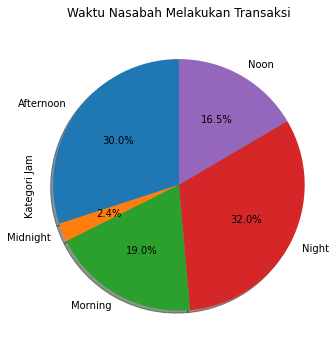

In [81]:
# autopct create %, start angle represent starting pointdf_
df_pivot1['Kategori Jam'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Waktu Nasabah Melakukan Transaksi')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

- Dalam pengelompokan kategori waktu melakukan transaksi didapatkan hasil bahwa kebanyakan transaksi dilakukan di malam hari yaitu pada pukul  18.00  – 24.00  dimana presentase transaksi adalah 32%.  
- Transasaksi terbanyak dilakukan pada kategori Afternoon disini adalah banyak transaksi yang dilakukan pada pukul  13.00 – 17.00 dengan presentase sebanyak 30%
- data tabel pivot 2 didapatkan database untuk Merchant Type terbanyak transaksi pada malam hari dan siang hari yatu pada pukul 13.00-24.00 adalah "Restaurant". Merchant Type terbanyak nominal transaksi adalah pada kategori Restaurants	 

###  2. Membuat Kategori Hari dan Minggu

In [88]:
#membuat kategori hari dari Transaction Date
data['Day']= data["Transaction Date"].dt.day_name()
data.head()

,Transaction Number,Merchant ID,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam,Merchant Criteria,Merchant Type,Kategori Jam,Day,Hari
10015,B004561428,X610153755,DANA,100000.0,2022-07-01 00:13:49,2022-07-01,00:13:49,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10014,B004561651,X610006258,DANA,30000.0,2022-07-01 00:43:01,2022-07-01,00:43:01,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10013,B004561820,X610153755,DANA,50000.0,2022-07-01 01:12:04,2022-07-01,01:12:04,1,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10012,B004561975,X610153453,OVO,49412.0,2022-07-01 01:44:30,2022-07-01,01:44:30,1,(UMI) Usaha Mikro,Automobiles And Vehicles,Midnight,Friday,Weekday
10011,B004562347,X612094437,DANA,68000.0,2022-07-01 03:26:26,2022-07-01,03:26:26,3,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Midnight,Friday,Weekday


In [89]:
#melihat proporsi hari
data_day = data['Day'].value_counts()
data_day.head()

Sunday       1673
Friday       1534
Saturday     1505
Thursday     1492
Wednesday    1391
Name: Day, dtype: int64

In [90]:
df_pivot3 = df_final.pivot_table( index= ['Day'], aggfunc={'Day':'count'})
df_pivot3

,Day
Day,
Friday,1534
Monday,1082
Saturday,1505
Sunday,1674
Thursday,1492
Tuesday,1314
Wednesday,1391


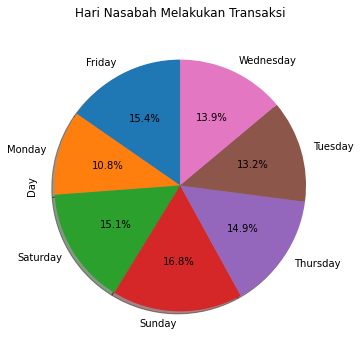

In [91]:
# autopct create %, start angle represent starting pointdf_
df_pivot3['Day'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Hari Nasabah Melakukan Transaksi')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [92]:
x = [
    (df_final['Day'] == "Monday") | (df_final['Day'] == "Tuesday") | (df_final['Day'] == "Wednesday") | (df_final['Day'] == "Thursday") | (df_final['Day'] == "Friday"),
    (df_final['Day'] == "Sunday") | (df_final['Day'] == "Saturday")
]

y = ["Weekday","Weekend"]

df_final['Hari']= np.select(x, y)


In [93]:
df_final.head()

,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam,Merchant Criteria,Merchant Type,Kategori Jam,Day,Hari
10015,B004561428,X610153755,Pembayaran,DANA,100000.0,2022-07-01 00:13:49,2022-07-01,00:13:49,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10014,B004561651,X610006258,Pembayaran,DANA,30000.0,2022-07-01 00:43:01,2022-07-01,00:43:01,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10013,B004561820,X610153755,Pembayaran,DANA,50000.0,2022-07-01 01:12:04,2022-07-01,01:12:04,1,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday
10012,B004561975,X610153453,Pembayaran,OVO,49412.0,2022-07-01 01:44:30,2022-07-01,01:44:30,1,(UMI) Usaha Mikro,Automobiles And Vehicles,Midnight,Friday,Weekday
10011,B004562347,X612094437,Pembayaran,DANA,68000.0,2022-07-01 03:26:26,2022-07-01,03:26:26,3,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Midnight,Friday,Weekday


In [94]:
cross_tab = pd.crosstab(index=data['Merchant Type'],
                        columns=data['Hari'])
cross_tab

Hari,Weekday,Weekend
Merchant Type,,
Automobile Rental,148,30
Automobiles And Vehicles,107,73
Clothing,90,69
Community Agencies,39,43
Computer,5,0
Department Stores,29,36
Education,5,0
Electronic,13,4
Entertainment,116,235


In [97]:
cross_tab_prop = pd.crosstab(index=data['Merchant Type'],
                             columns=data['Hari'],
                             normalize="index")
cross_tab_prop

Hari,Weekday,Weekend
Merchant Type,,
Automobile Rental,0.831461,0.168539
Automobiles And Vehicles,0.594444,0.405556
Clothing,0.566038,0.433962
Community Agencies,0.475610,0.524390
Computer,1.000000,0.000000
Department Stores,0.446154,0.553846
Education,1.000000,0.000000
Electronic,0.764706,0.235294
Entertainment,0.330484,0.669516


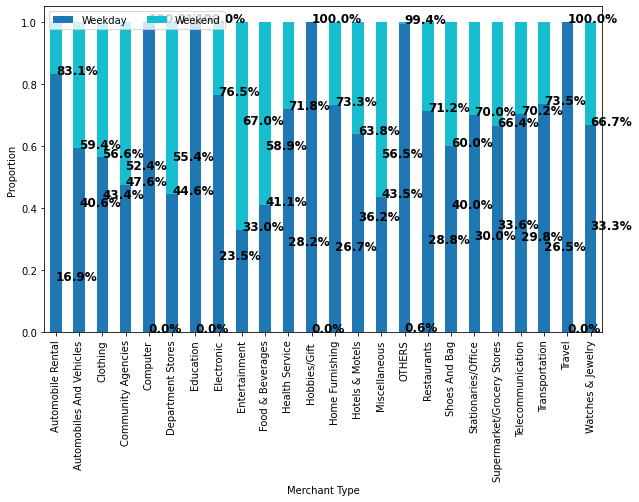

In [100]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Merchant Type")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

- Dapat diketahui bahwa pada bar chart transaksi hari paling banyak transaksi adalah hari Minggu dan untuk paling sedikit adalah hari Senin.
- Range transaksi tiap harinya hampir sama yaitu sekitar 1000 hingga 1500 transaksi setiap harinya.
- kita dapat meilihat beberapa merchat type hanya ada transaksi saat "Weekday" seperti contohnya adalah Travel dan Hobbies/Gift.
- Proporsi transaksi di hari weekend terbanyak adalah pada kategori Entertaiment, Food and Baverage.


###  Kategori On Us dan Off Us

Kategori On Us adalah Transasksi dari BRI ke BRI sedangkan untuk Off Us adalah dari BRI ke Bank Lainnya.

In [108]:

data["On/Off"] = np.nan
for i in range (0, len(data)):
    if data["Nama Issuer"][i] == "BRI" :
        data["On/Off"][i] = "ON US"
    else:
        data["On/Off"][i] = "OFF US"


C:\Users\user\AppData\Local\Temp\ipykernel_7572\2023887347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["On/Off"][i] = "OFF US"


In [109]:
data.head()

,level_0,index,Transaction Number,Merchant ID,Nama Issuer,Nominal,Transaction Date,Tanggal,Waktu,Jam,Merchant Criteria,Merchant Type,Kategori Jam,Day,Hari,Tagging,On/Off
0,0,10015,B004561428,X610153755,DANA,100000.0,2022-07-01 00:13:49,2022-07-01,00:13:49,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday,OFF US,OFF US
1,1,10014,B004561651,X610006258,DANA,30000.0,2022-07-01 00:43:01,2022-07-01,00:43:01,0,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday,OFF US,OFF US
2,2,10013,B004561820,X610153755,DANA,50000.0,2022-07-01 01:12:04,2022-07-01,01:12:04,1,(UMI) Usaha Mikro,Restaurants,Midnight,Friday,Weekday,OFF US,OFF US
3,3,10012,B004561975,X610153453,OVO,49412.0,2022-07-01 01:44:30,2022-07-01,01:44:30,1,(UMI) Usaha Mikro,Automobiles And Vehicles,Midnight,Friday,Weekday,OFF US,OFF US
4,4,10011,B004562347,X612094437,DANA,68000.0,2022-07-01 03:26:26,2022-07-01,03:26:26,3,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Midnight,Friday,Weekday,OFF US,OFF US


In [110]:
#melihat proporsi on us atau off us
data['On/Off'].value_counts()

OFF US    9619
ON US      372
Name: On/Off, dtype: int64

In [112]:
df_pivot4 = data.pivot_table( index= ['On/Off'], aggfunc={'On/Off':'count'})
df_pivot4

,On/Off
On/Off,
OFF US,9619
ON US,372


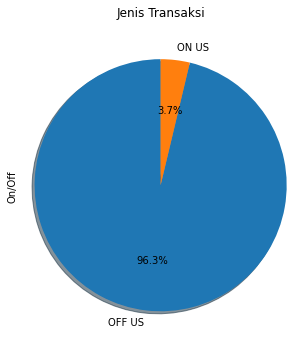

In [114]:
# autopct create %, start angle represent starting pointdf_
df_pivot4['On/Off'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Jenis Transaksi')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Didapatkan hasil bahwa jenis transaksi On Us memiliki presentase 3,7% sedangkan sisanya 96,3% memiliki presentase transaksi 96,3%. 

In [115]:
df_pivot4 = data.pivot_table(  index = ['Merchant Type'] ,columns = ['On/Off'], aggfunc={'On/Off':'count'})
df_pivot4

On/Off       
On/Off                      OFF US  ON US
Merchant Type                            
Automobile Rental            177.0    1.0
Automobiles And Vehicles     174.0    6.0
Clothing                     145.0   14.0
Community Agencies            79.0    3.0
Computer                       4.0    1.0
Department Stores             62.0    3.0
Education                      5.0    NaN
Electronic                    17.0    NaN
Entertainment                341.0   10.0
Food & Beverages             433.0   27.0
Health Service               379.0   32.0
Hobbies/Gift                   3.0    NaN
Home Furnishing               26.0    4.0
Hotels & Motels               44.0    3.0
Miscellaneous               1435.0   50.0
OTHERS                      1591.0    NaN
Restaurants                 4265.0  195.0
Shoes And Bag                  4.0    1.0
Stationaries/Office           18.0    2.0
Supermarket/Grocery Stores   251.0   14.0
Telecommunication             45.0    2.0
Transportation               109.0    4.0
Travel                         6.0    NaN
Watches & Jewelry              6.0    NaN

#  Analisis Tambahan Pivot dan Visualisasi

In [118]:
df_pivot5 = data.pivot_table( index= ['Nama Issuer','Merchant ID'], aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'}).sort_values(by='Nominal', ascending = False)
df_pivot5

Nominal  Transaction Number
Nama Issuer Merchant ID                               
BCA         X605045913   9134500.0                   3
DANA        X610153755   7226888.0                  91
BCA         X610153754   7000000.0                   1
            X610117010   6606500.0                   2
DANA        X612094437   6488215.0                  88
...                            ...                 ...
            X212003800         1.0                   1
            X210339206         1.0                   1
BNI         X616005031         1.0                   1
DANA        X209138494         1.0                   1
LINKAJA     X208218891         1.0                   1

[4774 rows x 2 columns]

In [119]:
df_pivot6 = data.pivot_table( index= ['Nama Issuer','Merchant ID'], aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'}).sort_values(by='Transaction Number', ascending = False)
df_pivot6

Nominal  Transaction Number
Nama Issuer Merchant ID                               
BNI         X610002918   4354102.0                 514
OVO         X601500090    608000.0                 128
DANA        X610153755   7226888.0                  91
            X612094437   6488215.0                  88
BNI         X601500166       162.0                  87
...                            ...                 ...
            X611001498     70400.0                   1
            X611002051     25988.0                   1
            X611007502     36000.0                   1
            X611009502    220000.0                   1
SPIN        X610500605     53500.0                   1

[4774 rows x 2 columns]

In [120]:
df_pivot7 = data.pivot_table( index= ['Kategori Jam','Merchant Type'], aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'}).sort_values(by='Nominal', ascending = False)
df_pivot7

Nominal  Transaction Number
Kategori Jam Merchant Type                                     
Night        Restaurants        164561073.0                1712
Afternoon    Restaurants        106533755.0                1311
Noon         Restaurants         54086764.0                 775
Night        Miscellaneous       49297828.0                 600
Morning      Restaurants         41451377.0                 543
...                                     ...                 ...
Noon         OTHERS                 37073.0                 394
             Electronic             30000.0                   1
Afternoon    Travel                 26000.0                   2
Midnight     Food & Beverages       15000.0                   1
Afternoon    Watches & Jewelry          3.0                   1

[96 rows x 2 columns]

In [122]:
df_pivot8 = data.pivot_table( index= 'Merchant ID', columns= 'Nama Issuer', aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'})
df_pivot8 = df_pivot8.fillna(0)
df_pivot8

Nominal                                             \
Nama Issuer ARTHA GRAHA ASTRAPAY Allo Bank BANK KEB HANA BANK MEGA   
Merchant ID                                                          
X1010172            0.0      0.0       0.0           0.0       0.0   
X11017480           0.0      0.0       0.0           0.0       0.0   
X12000017           0.0      0.0       0.0           0.0       0.0   
X12126900           0.0      0.0       0.0           0.0       0.0   
X12208583           0.0      0.0       0.0           0.0       0.0   
...                 ...      ...       ...           ...       ...   
X618500133          0.0      0.0       0.0           0.0       0.0   
X618500135          0.0      0.0       0.0           0.0       0.0   
X618500136          0.0      0.0       0.0           0.0       0.0   
X6990048            0.0      0.0       0.0           0.0       0.0   
X8064420            0.0      0.0       0.0           0.0       0.0   

                                                                     \
Nama Issuer BANK NATIONAL NOBU BANK QNB INDONESIA BANK UOB      BCA   
Merchant ID                                                           
X1010172                   0.0                0.0      0.0      0.0   
X11017480                  0.0                0.0      0.0      0.0   
X12000017                  0.0                0.0      0.0      0.0   
X12126900                  0.0                0.0      0.0      0.0   
X12208583                  0.0                0.0      0.0  99000.0   
...                        ...                ...      ...      ...   
X618500133                 0.0                0.0      0.0      0.0   
X618500135                 0.0                0.0      0.0      0.0   
X618500136                 0.0                0.0      0.0      0.0   
X6990048                   0.0                0.0      0.0      0.0   
X8064420                   0.0                0.0      0.0      0.0   

                        ... Transaction Number                             \
Nama Issuer        BNI  ...          OCBC NISP  OVO PERMATA POS Indonesia   
Merchant ID             ...                                                 
X1010172      226600.0  ...                0.0  0.0     0.0           0.0   
X11017480          0.0  ...                0.0  0.0     0.0           0.0   
X12000017          1.0  ...                0.0  0.0     0.0           0.0   
X12126900    2878520.0  ...                0.0  0.0     0.0           0.0   
X12208583     134000.0  ...                0.0  0.0     0.0           0.0   
...                ...  ...                ...  ...     ...           ...   
X618500133      1506.0  ...                0.0  0.0     0.0           0.0   
X618500135       405.0  ...                0.0  0.0     0.0           0.0   
X618500136        13.0  ...                0.0  0.0     0.0           0.0   
X6990048      242000.0  ...                0.0  0.0     0.0           0.0   
X8064420      156150.0  ...                0.0  0.0     0.0           0.0   

                                                               \
Nama Issuer PT Bank BPD Kalimantan Timur dan Kalimantan Utara   
Merchant ID                                                     
X1010172                                                  0.0   
X11017480                                                 0.0   
X12000017                                                 0.0   
X12126900                                                 0.0   
X12208583                                                 0.0   
...                                                       ...   
X618500133                                                0.0   
X618500135                                                0.0   
X618500136                                                0.0   
X6990048                                                  0.0   
X8064420                                                  0.0   

                                                  

In [123]:
df_pivot9 = data.pivot_table( index= 'Nama Issuer', aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'}).astype(int).sort_values(by='Nominal', ascending = False)
df_pivot9 = df_pivot9.fillna(0)
df_pivot9.head()

,Nominal,Transaction Number
Nama Issuer,,
BCA,286343819,1865
BNI,176433236,3976
MANDIRI,117759576,702
DANA,74091233,1146
BRI,67091929,372


#  Intrepetasi Data

1. Variabel yang ada digunkan untuk apa ?
Dari tabel pivot diatas variabel yang digunakan berguna untuk beberpa hal yang dapat menggambarkan keadaan dari merchant dan issuer.

- Variabel Merchant Id adalah Kode Merchant dimana menandakan untuk setiap Merchat tergolong dalam kategori kreiteria dan merchant type
-  Variabel Nama Issuer adalah Variabel yang digunakan untuk melihat Isuuer yang ada siapa yang akan menjadi top untuk nominal dan frekuensi transaksi
- Jam ini adalah variabel date yang digunakan untuk melihat trend waktu disetiap merchat atau nama issuer sering melakukan transaksi pada jam keberapa. 
- Tanggal adalah variabel yang dapat digunakan untuk dilakukan analisis timeseries seingga adapat dikelompokan setiap issuer dan dapat dilakukan analisis prediktif
 

2. Informasi yang didapatkan itu apa saja?

- Dalam dataframe pivot 5 dapat diketahui bahwa untuk nama isuuer dengan nominal terbesar adalah BCA dengan nomor Merchant ID X605045913 dengan total nominal Rp. 9.134.500,- dan jumlah traksasi adalah 3 kali transaksi sehingga rata-ratanya adalah Rp 3.044.833,- dalam sekali transaksi
- Dalam dataframe pivot 6 dapat diketahui bahwa untuk frekuensi transaksi terbesar adalah BNI dengan nomor Merchat ID X610002918 dengan total transaksi sebanyak 514 Transaksi.
- Dalam Kategori jam saya mengelompokan mejadi 5 zona kategori 
- Dalam Pivot 7 dapat diketahui bajwa Merchat Type paling banyak untuk total nominal dan frekuensi transasksi adalah Restaurants. 
- Merchant Type Restaurants Paling banyak melakukan transaksi pada Malam dan Afternoon
- Untuk Merchant ID X12208583 lebih banyak transaksi di Perbankan hal ini dapat menjadikan evaluasi untuk issuer lain untuk merchat tersebut diberikan promo agar terdapat nilai transaksinya
- Dari database uamh ada Nominal transaksi terbesar adalah BCA, BNI, Mandiri, Dana, dan urutan ke 5 adalah BRI 
- Dari segi frekuensi transaksi dapat diketahui issuer terbanyak frekuensi transaksi adalah BNI, BCA, DANA, Mandiri dan OVO. Hal ini BRI masih belum termasuk 5 issuer yang memiliki frekuensi transaksi terbanyak sehingga perlu ditingkatkan dengan cara penambahan promo atapun sebagainya


3. Informasi apa yang dapat ditambahkan dalam analisis yang telah dilakukan ?
- Dapat dilakukan penambahan variabel lokasi transaksi sehingga dapat terbentuk analisis deskriptif untuk melihat setiap clustering daerah akan seperti apa karakteristiknya dan juga dapat dilakukan analisis pengelompokan lebih lanjut
- Variabel yang dapat ditambahkan selanjutnya adalah karakteristik untuk yang memlakukan transksinya disini kita dapat bertujuan adaalah untuk melihat permodelan dan prediktif
- variabel selanjutnya adalah memabahkan beberapa kategori untuk disetiap issuer dan juga merchant type hal ini adalah bertujuan memudahkan membaca deskriptif secara analisis dan juga analisis lanjutan

Tambahan analisis

In [125]:
df_pivot10 = data.pivot_table( index= 'Merchant Criteria', aggfunc={'Nominal':'sum', 'Transaction Number' : 'count'}).astype(int).sort_values(by='Nominal', ascending = False)
df_pivot10 = df_pivot10.fillna(0)
df_pivot10.head()

,Nominal,Transaction Number
Merchant Criteria,,
(UMI) Usaha Mikro,328904420,5007
(UBE) Usaha Besar,249050420,2479
(UKE) Usaha Kecil,179669798,1508
(UME) Usaha Menengah,115644989,984
(URE) Usaha Reguler,1575924,13


Dari data diatas dapat diketahui nominal terbesar adalah pada segmentasi pacar merchant criteria Usaha Mikro (UMI) dengan jumlah transaksi adalah sebanayak 5007 transaksi. Dari pivot diatas dapat diketahui bahwa untuk nominal terbanyak dan juga transaksi terbanyak adalah pada merchant type restoran 

In [131]:
df_pivot11 = data.pivot_table( index = 'Tanggal' ,columns= 'Merchant Criteria', aggfunc={'Nominal':'sum'})
df_pivot11.head()

Nominal                                         \
Merchant Criteria (UBE) Usaha Besar (UKE) Usaha Kecil (UME) Usaha Menengah   
Tanggal                                                                      
2022-07-01                4216397.0        11481637.0            2872850.0   
2022-07-02               10119540.0        14483517.0            2610594.0   
2022-07-03                6572289.0         9089959.0            1900880.0   
2022-07-04                5332499.0         5105852.0            3344700.0   
2022-07-05               16579592.0         6460081.0            2533373.0   

                                                         
Merchant Criteria (UMI) Usaha Mikro (URE) Usaha Reguler  
Tanggal                                                  
2022-07-01               10172529.0                 NaN  
2022-07-02               13264685.0                 NaN  
2022-07-03               10815154.0                 NaN  
2022-07-04                4150536.0             47000.0  
2022-07-05                9304123.0            140000.0

AttributeError: 'AxesSubplot' object has no attribute 'plot_tanggal'

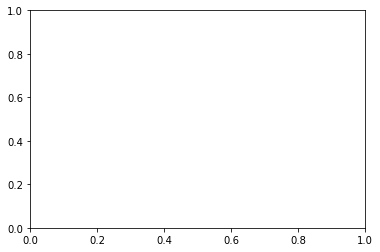

In [134]:
fix,ax = plt.subplots()
ax.plot_tanggal(pivot11['Tanggal'], pivot11["(UBE) Usaha Besar"], color ="Dark Blue", label ="UBE", linestyle="-")
ax.plot_tanggal(pivot11['Tanggal'], pivot11["(UKE) Usaha Kecil"], color ="Dark Cyan", label ="UKE", linestyle=".")
ax.plot_tanggal(pivot11['Tanggal'], pivot11["(UME) Usaha Menengah"], color ="Coral", label ="UME", linestyle=":")
ax.plot_tanggal(pivot11['Tanggal'], pivot11["(UMI) Usaha Mikro"], color ="Chocolate", label ="UMI", linestyle="-")
ax.legend()